In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [4]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_ds = keras.utils.image_dataset_from_directory(
    directory=r"E:\Project\Cat_Dog_Classification_using_CNN\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"E:\Project\Cat_Dog_Classification_using_CNN\test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize
def normalize(image, label):
    image  = tf.cast(image/255, tf.float32)
    return image, label
train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [6]:
# Tạo model CNN có L2 để tránh overfitting
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3),
                 kernel_regularizer=regularizers.l2(1e-3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu",
                 kernel_regularizer=regularizers.l2(1e-3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu",
                 kernel_regularizer=regularizers.l2(1e-3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu",
                kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(64, activation="relu",
                kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(1, activation="sigmoid"))

e:\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
#Sử dụng Early Stopping để tránh overfitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=[early_stop])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 911s 1s/step - accuracy: 0.5337 - loss: 0.9008 - val_accuracy: 0.6150 - val_loss: 0.7189
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 961s 2s/step - accuracy: 0.6310 - loss: 0.6874 - val_accuracy: 0.6970 - val_loss: 0.6345
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 982s 2s/step - accuracy: 0.7016 - loss: 0.6137 - val_accuracy: 0.7220 - val_loss: 0.5903
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.7238 - loss: 0.5760 - val_accuracy: 0.7476 - val_loss: 0.5619
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1081s 2s/step - accuracy: 0.7559 - loss: 0.5398 - val_accuracy: 0.7722 - val_loss: 0.5292
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 801s 1s/step - accuracy: 0.7755 - loss: 0.5143 - val_accuracy: 0.7852 - val_loss: 0.5199
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 795s 1s/step - accuracy: 0.8020 - loss: 0.4816 - val_accuracy: 0.7916 - val_loss: 0.5025
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 801s 1s/step - accuracy: 0.8117 - loss: 0.4666 - val_acc

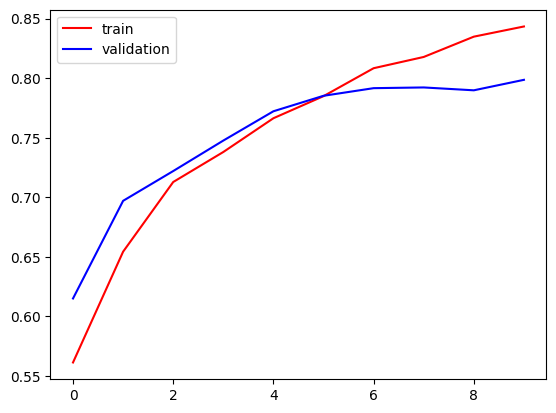

In [10]:
# Hiển thị kết quả accuracy
plt.plot(history.history["accuracy"], color = 'red', label="train")
plt.plot(history.history["val_accuracy"], color = 'blue', label="validation")
plt.legend()
plt.show()

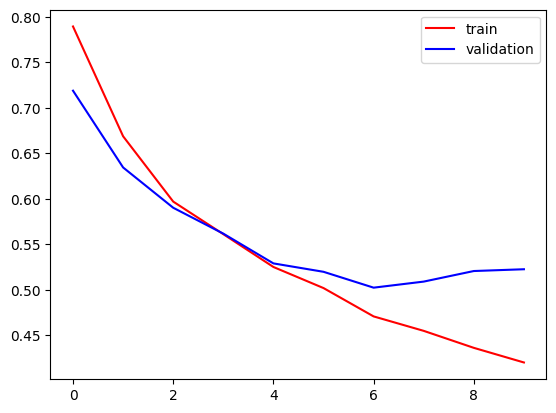

In [11]:
# Hiển thị kết quả loss

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# Lưu model
model.save("cat_dog_cnn.h5")

In [ ]:
#Tạo giao diện người dùng để dự đoán ảnh mèo hoặc chó
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import cv2
import numpy as np

def predict_image():
    file_path = filedialog.askopenfilename()
    if not file_path:
        return
    # Đọc và xử lý ảnh
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Chuyển sang ảnh 
    img_resized = cv2.resize(img_rgb, (256, 256))
    img_norm = img_resized / 255.0
    input_img = img_norm.reshape(1, 256, 256, 3)
    # Dự đoán
    pred = model.predict(input_img)[0][0]
    label = "Đây là con chó" if pred >= 0.5 else "Đây là con mèo" #Nếu giá trị dự đoán >= 0.5 thì là chó, ngược lại là mèo
    # Hiển thị ảnh và kết quả
    img_pil = Image.fromarray(img_rgb)
    img_pil = img_pil.resize((256, 256))
    img_tk = ImageTk.PhotoImage(img_pil)
    panel.config(image=img_tk)
    panel.image = img_tk
    result_label.config(text=label)

# Tạo cửa sổ giao diện
root = tk.Tk()
root.title("Cat vs Dog Classifier")

btn = tk.Button(root, text="Chọn ảnh", command=predict_image)
btn.pack()

panel = tk.Label(root)
panel.pack()

result_label = tk.Label(root, text="", font=("Arial", 16))
result_label.pack()

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
#Chạy lại model đã lưu
from keras.models import load_model
model = load_model("cat_dog_cnn.h5")